# Activity 1: Dataset Design & Student Profiling

---

## Objective:

Validate that the student dataset reflects realistic academic, engagement, wellness, and career behavior patterns required for mentoring recommendations.

In [4]:
# selecting the correct working directory
import os 

os.chdir('d:\\Desktop\\DSML\\Internship\\HePro code')
os.getcwd()

'd:\\Desktop\\DSML\\Internship\\HePro code'

In [5]:
# loading the dataset
import pandas as pd 

dataset = pd.read_csv('./data/raw/students.csv')

In [6]:
# show some rows

dataset.head()

,student_id,age,program,semester,gpa,attendance,assignment_completion,engagement_score,stress_level,career_clarity,sleep_hours,mental_wellbeing,productivity_score,distractions
0,S001,18,B.Sc,1,9.1,28.7,93.0,36.2,5,7,6.0,6,8,2
1,S002,23,MBA,1,8.9,26.4,85.2,42.4,4,6,6.4,7,7,4
2,S003,21,B.Tech,4,8.6,30.3,86.0,42.5,4,5,6.4,6,5,4
3,S004,21,MBA,4,9.1,30.0,83.3,41.7,6,7,5.6,3,7,2
4,S005,18,BCA,3,9.1,41.4,77.8,36.9,6,7,5.6,5,5,5


In [ ]:
# dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             100 non-null    object 
 1   age                    100 non-null    int64  
 2   program                100 non-null    object 
 3   semester               100 non-null    int64  
 4   gpa                    100 non-null    float64
 5   attendance             100 non-null    float64
 6   assignment_completion  100 non-null    float64
 7   engagement_score       100 non-null    float64
 8   stress_level           100 non-null    int64  
 9   career_clarity         100 non-null    int64  
 10  sleep_hours            100 non-null    float64
 11  mental_wellbeing       100 non-null    int64  
 12  productivity_score     100 non-null    int64  
 13  distractions           100 non-null    int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 11.1+ KB


In [8]:
# dataset shapes and size
dataset.shape

(100, 14)

In [39]:
# validating feature range

numeric_cols = [
    "gpa", "attendance", "assignment_completion", "engagement_score",
    "stress_level", "sleep_hours", "mental_wellbeing",
    "productivity_score", "distractions", "career_clarity"
]

dataset[numeric_cols].describe()

,gpa,attendance,assignment_completion,engagement_score,stress_level,sleep_hours,mental_wellbeing,productivity_score,distractions,career_clarity
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,7.162000,65.479000,68.232000,56.015000,5.710000,5.716000,4.340000,4.980000,4.850000,3.88000
std,1.738906,23.676167,20.664476,19.371479,2.323768,0.929507,2.479084,1.853089,2.090744,1.68942
min,4.200000,26.400000,35.400000,30.400000,1.000000,4.400000,1.000000,2.000000,1.000000,1.00000
25%,5.400000,45.300000,48.025000,38.375000,4.000000,4.800000,2.750000,3.000000,3.000000,3.00000
50%,7.500000,69.750000,70.850000,52.050000,6.000000,5.600000,4.000000,5.000000,5.000000,4.00000
75%,8.825000,88.150000,89.075000,73.650000,8.000000,6.400000,6.000000,7.000000,7.000000,5.00000
max,9.400000,94.800000,94.800000,89.100000,9.000000,7.600000,10.000000,8.000000,9.000000,7.00000


In [ ]:
# stress level counts
dataset['stress_level'].value_counts().sort_index().reset_index()

,stress_level,count
0,1,6
1,2,5
2,3,8
3,4,14
4,5,7
5,6,19
6,7,12
7,8,19
8,9,10


## Archetype Level Profiling

### High Stress + Low Productivity

In [16]:
dataset[dataset['stress_level'] > 8][['stress_level', 'productivity_score']].head()

,stress_level,productivity_score
26,9,3
28,9,5
31,9,3
34,9,4
37,9,4


### Low GPA + High Engagement

In [21]:
dataset[(dataset['gpa'] < 6.0) & (dataset['engagement_score'] > 70)][['gpa', 'engagement_score']].head()

,gpa,engagement_score
25,5.6,76.4
28,5.9,70.2
32,5.1,78.0
35,5.7,85.1
36,5.4,87.7


### High GPA + Low Career Clarity

In [24]:
dataset[(dataset['gpa'] > 8.0) & (dataset['career_clarity'] < 5)][['gpa', 'career_clarity']].head()

,gpa,career_clarity
53,8.2,3
54,8.7,4
55,8.2,3
56,8.8,3
57,9.2,3


## Visual Sanity Checks

<Axes: xlabel='stress_level', ylabel='sleep_hours'>

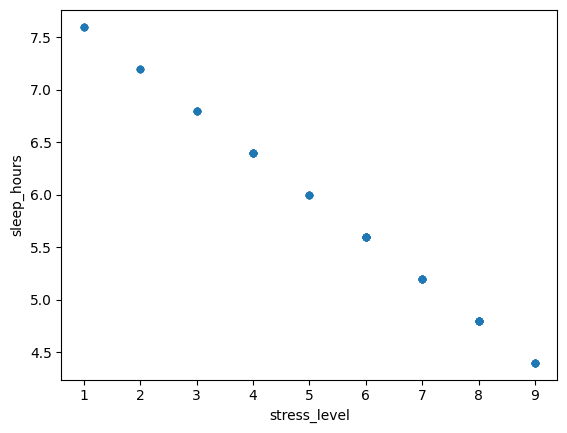

In [26]:
# sleep hours and stress levels are inversely proportional

dataset.plot.scatter(x='stress_level', y='sleep_hours')

<Axes: xlabel='gpa', ylabel='engagement_score'>

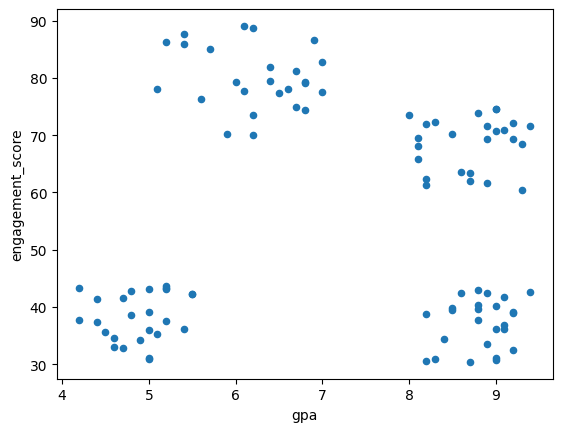

In [37]:
# good academics not always means high engagement

dataset.plot.scatter(x='gpa', y='engagement_score')

<Axes: xlabel='gpa', ylabel='career_clarity'>

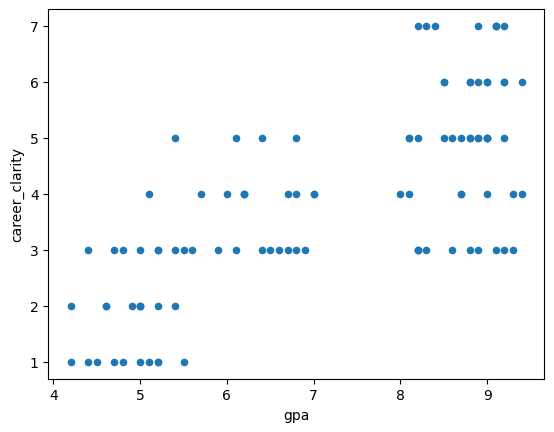

In [38]:
# career clarity varies independently of academic success

dataset.plot.scatter(x="gpa", y="career_clarity")


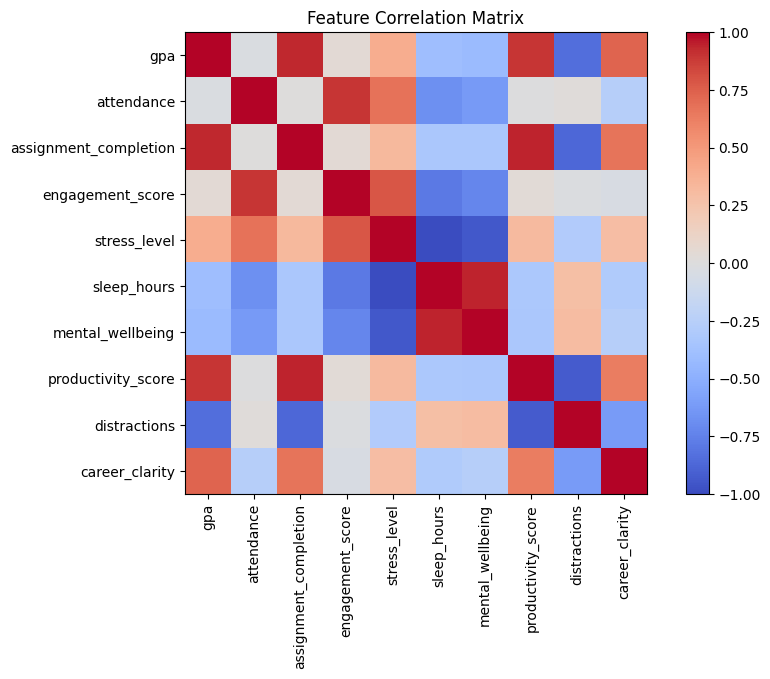

In [40]:
# Correlation Heatmap for Numerical Columns

import matplotlib.pyplot as plt

corr = dataset[numeric_cols].corr()

plt.figure(figsize=(10, 6))
plt.imshow(corr, cmap="coolwarm", interpolation="none")
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Feature Correlation Matrix")
plt.show()

## Key Observations

- Academic performance does not always align with engagement.
- High stress negatively impacts sleep and productivity.
- Career clarity varies independently of academic success.

These patterns validate the realism and suitability of the dataset for mentoring analytics and downstream modeling.